---
## Script para el análisis de secuencias con TraMineR.
>## Zona Centro Sur
---

**Autor**: Rodrigo Hernández A.  
**Tutora**: Dra. Nery Sofía Huerta.  
**Fecha**: 2 de Octubre, 2023.  

---

### Descripción:
>Script para el análisis de secuencias con TraMineR de la **zona Centro Sur**, la cual consta de 5 regiones y 47 comunas con juzgados que registran el delito de conducción en estado de ebriedad.

**Entorno**: R en Google Colab  
**Proyecto**: TFM - Máster en Big Data y Ciencia de Datos - Universidad Internacional de Valencia (VIU).

---

In [ ]:
# ---- Instalación de paquetes necesarios ----
install.packages("readxl")
install.packages("TraMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘vegan’




In [ ]:
# ---- Importación de paquetes necesarios ----
library(readxl)
library(TraMineR)
library(cluster)


TraMineR stable version 2.2-8 (Built: 2023-10-05)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.




In [ ]:
# ---- Carga de datos ---
#Descarga del conjunto de datos:
#    https://drive.google.com/drive/folders/1nyZ_bwVZIJUMBoozzjs8pi3jO1igzb7N
ZCE <- read_excel("/content/03-ZonaCentroSur.xlsx")

In [ ]:
ZCE <- as.data.frame(ZCE)
rownames(ZCE) <-  ZCE$Comuna
# ************************************************************************
seqstatl(ZCE[, 1:98])

ZCE.alphabet <- c("sobre","igual","bajo","sin_juzgado")
ZCE.labels <- c("Sobre","Igual","Bajo","Sin juzgado")
ZCE.scodes <- c("SO", "IG", "BA", "SJ")
ZCE.seq <- seqdef(ZCE, 2:98, alphabet = ZCE.alphabet, states = ZCE.scodes,
                  labels = ZCE.labels, xtstep = 4)
colores <- c( "#D98880","#2980B9","#73C6B6","#EB984E")  #Rojo, Azul, Verde, Naranja   https://htmlcolorcodes.com/

[1] "ARAUCO"                  "bajo"                   
 [3] "BULNES"                  "CABRERO"                
 [5] "CAÑETE"                  "CAUQUENES"              
 [7] "CHANCO"                  "CHIGUAYANTE"            
 [9] "CHILLAN"                 "COELEMU"                
[11] "CONCEPCION"              "CONSTITUCION"           
[13] "CORONEL"                 "CURANILAHUE"            
[15] "CUREPTO"                 "CURICO"                 
[17] "FLORIDA"                 "GRANEROS"               
[19] "igual"                   "LAJA"                   
[21] "LEBU"                    "LICANTEN"               
[23] "LINARES"                 "LITUECHE"               
[25] "LOS ANGELES"             "LOTA"                   
[27] "MOLINA"                  "MULCHEN"                
[29] "NACIMIENTO"              "PARRAL"                 
[31] "PERALILLO"               "PEUMO"                  
[33] "PICHILEMU"               "QUIRIHUE"               
[35] "RANCAGUA"                "RENGO"                  
[37] "SAN CARLOS"              "SAN FERNANDO"           
[39] "SAN JAVIER"              "SAN PEDRO LA PAZ"       
[41] "SAN VICENTE TAGUA-TAGUA" "SANTA BARBARA"          
[43] "SANTA CRUZ"              "SANTA JUANA"            
[45] "sobre"                   "TALCA"                  
[47] "TALCAHUANO"              "TOME"                   
[49] "YUMBEL"                  "YUNGAY"

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  sobre       SO       Sobre

     2  igual       IG       Igual

     3  bajo        BA       Bajo

     4  sin_juzgado SJ       Sin juzgado

 [>] 47 sequences in the data set

 [>] min/max sequence length: 97/97



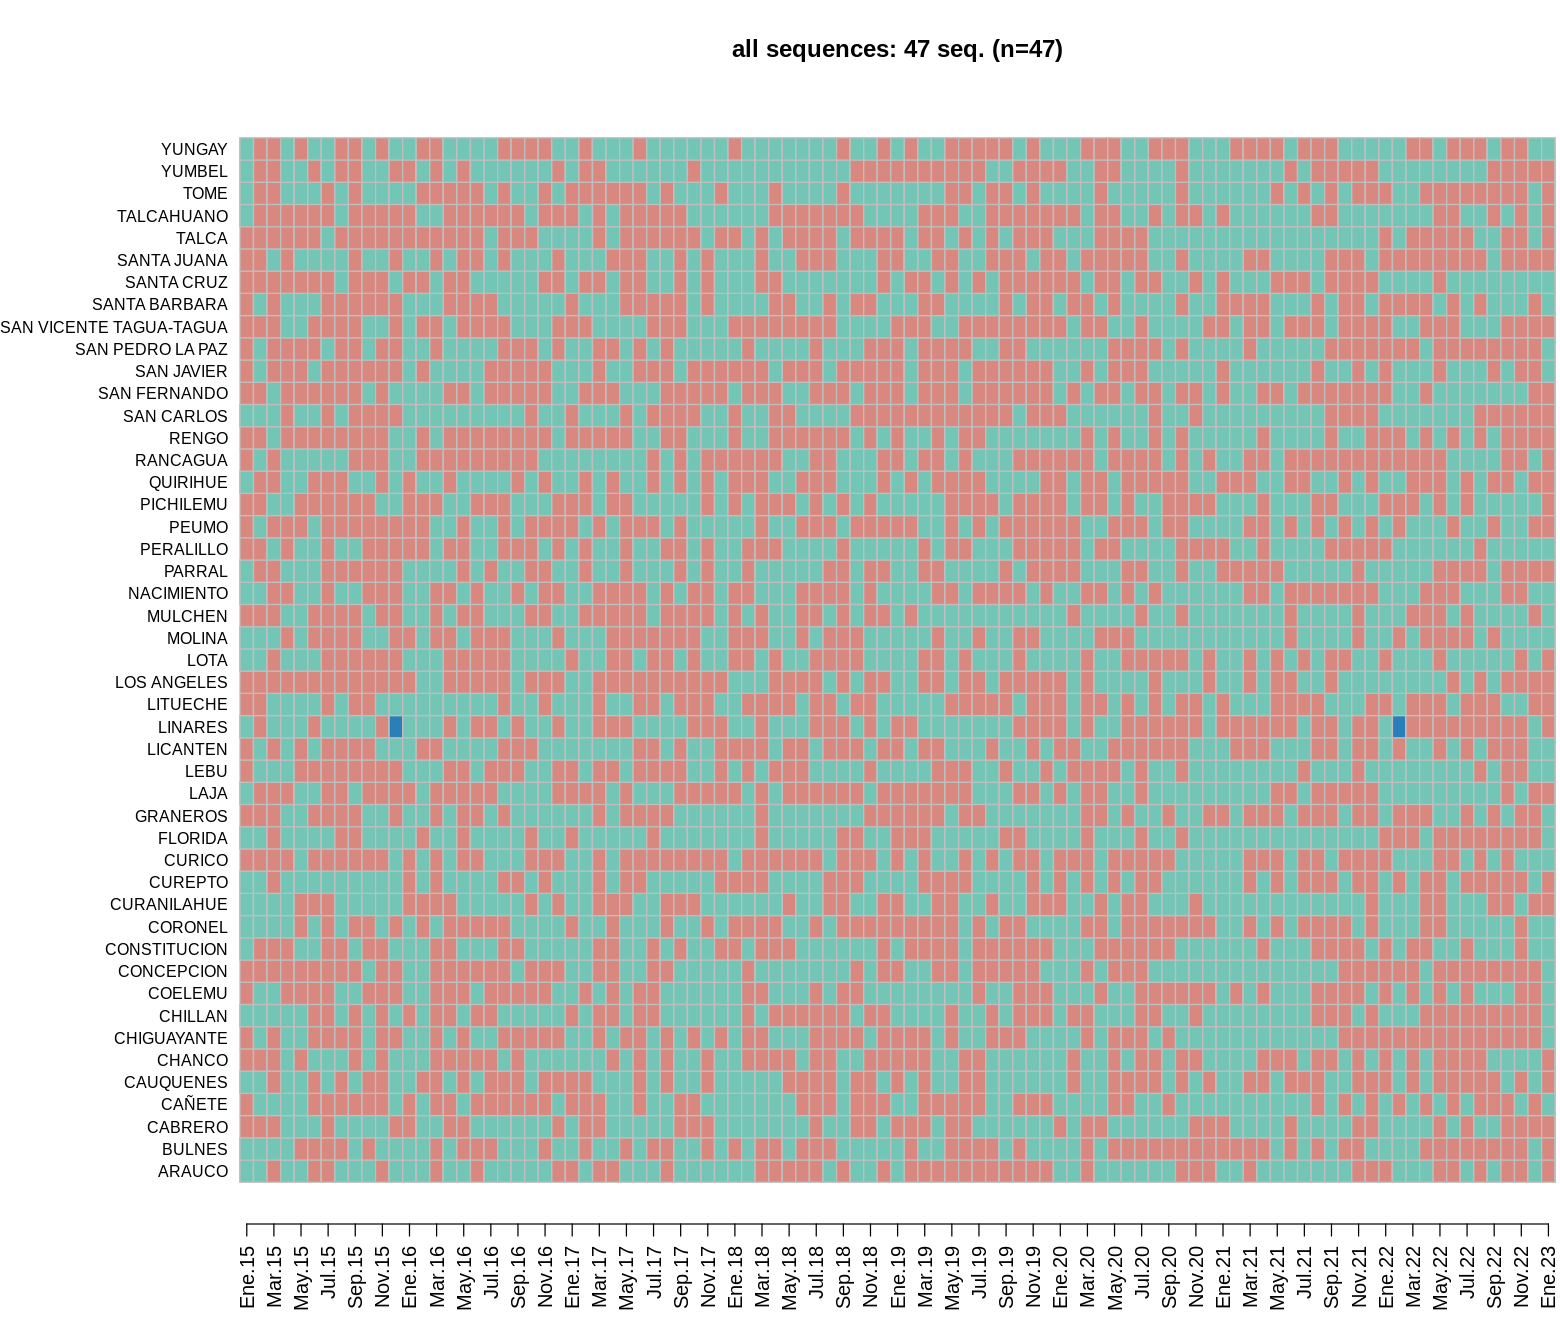

In [ ]:
#*************** Visualización de todas las secuencias **********
par(mar = c(4.0, 10.0, 4.0, 0.2)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=11)
seqIplot(ZCE.seq, with.legend = FALSE, border = "grey", ytlab = "id", ylas = 1, ylab = "", cex.axis = 0.8 , xtlab = FALSE, cpal = colores, main = 'all sequences: 47 seq. (n=47)', xtstep = 2)
text(x = seq(1, length(colnames(ZCE.seq)), by = 2)-0.5, y = par("usr")[3] - 1.0, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], srt = 90, adj = c(1.0, 0.5), xpd = TRUE, cex = 1.0)

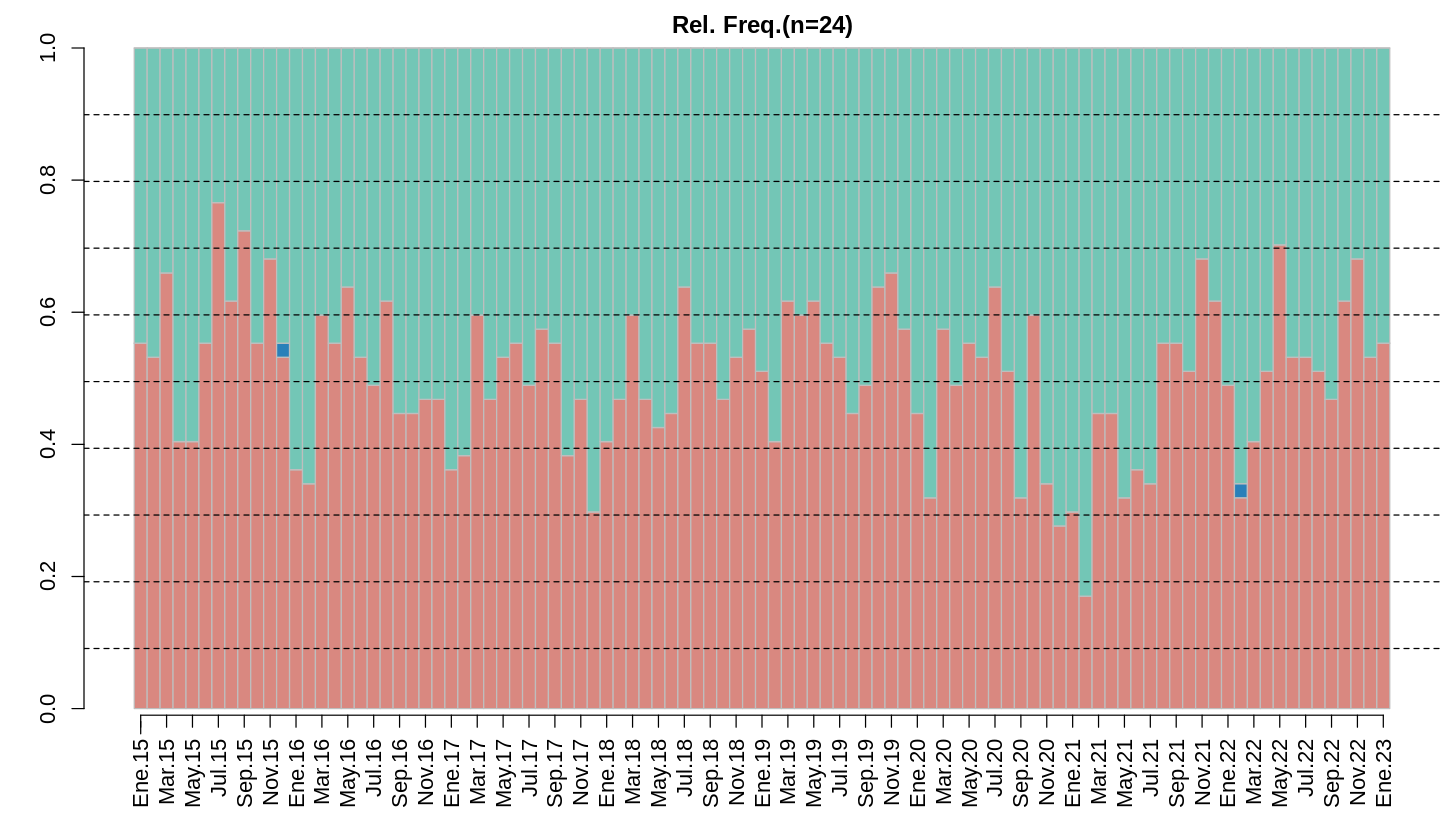

In [ ]:
#*********Distribución de estados (Porcentaje de cada estado en el tiempo)
par(mar = c(5.2, 3.5, 3.0, 0.0)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqdplot(ZCE.seq, with.legend = FALSE, border = "grey", cpal = colores, main = "Rel. Freq.(n=47)", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1)

Warning message in plot.window(xlim, ylim, log = log, ...):
“"ytstep" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"ytstep" is not a graphical parameter”


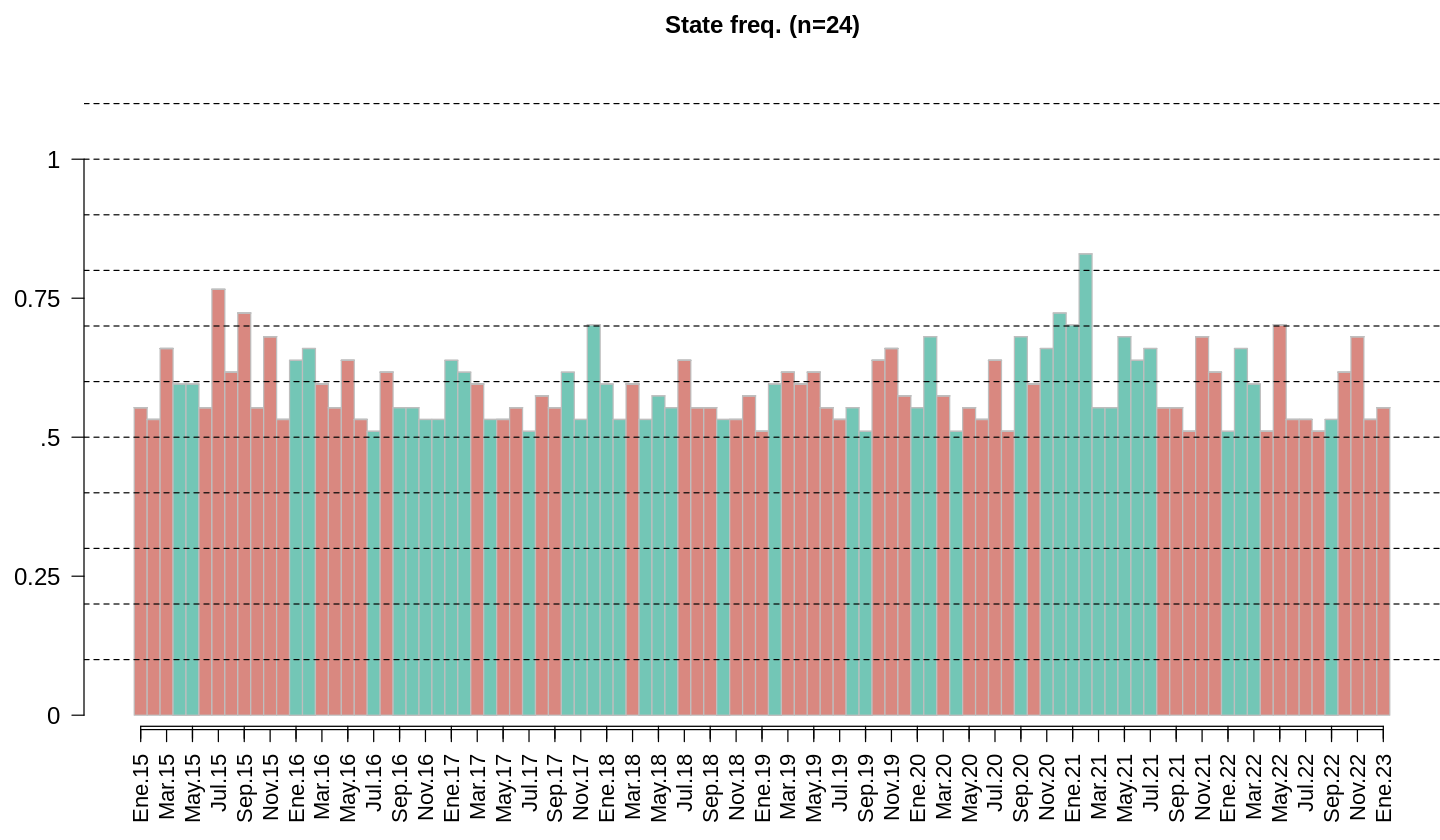

In [ ]:
#*********Distribución Temporal de los Estados Modales.
par(mar = c(5.2, 3.5, 3.0, 0.0)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqmsplot(ZCE.seq, info = FALSE, with.legend = FALSE, border = "grey", cpal = colores, main = "State freq. (n=24)", ylab= " ", xtlab = FALSE, cex.axis = 1.2, ytstep = 2)
grid(nx = 0, ny = 12, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-0.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1, line = 0.6)

In [ ]:
#**********************Cálculo de distancias con Optimal Matching********
dist.om1 <- seqdist(ZCE.seq, method = "OM", indel = 1, sm = "TRATE")
cost_matrix <- seqsubm(ZCE.seq, method = "TRATE")

 [>] 47 sequences with 4 distinct states

 [>] Computing sm with seqcost using  TRATE

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states SO/IG/BA/SJ ...

 [>] 47 distinct  sequences 

 [>] min/max sequence lengths: 97/97

 [>] computing distances using the OM metric

 [>] elapsed time: 0.184 secs

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states SO/IG/BA/SJ ...



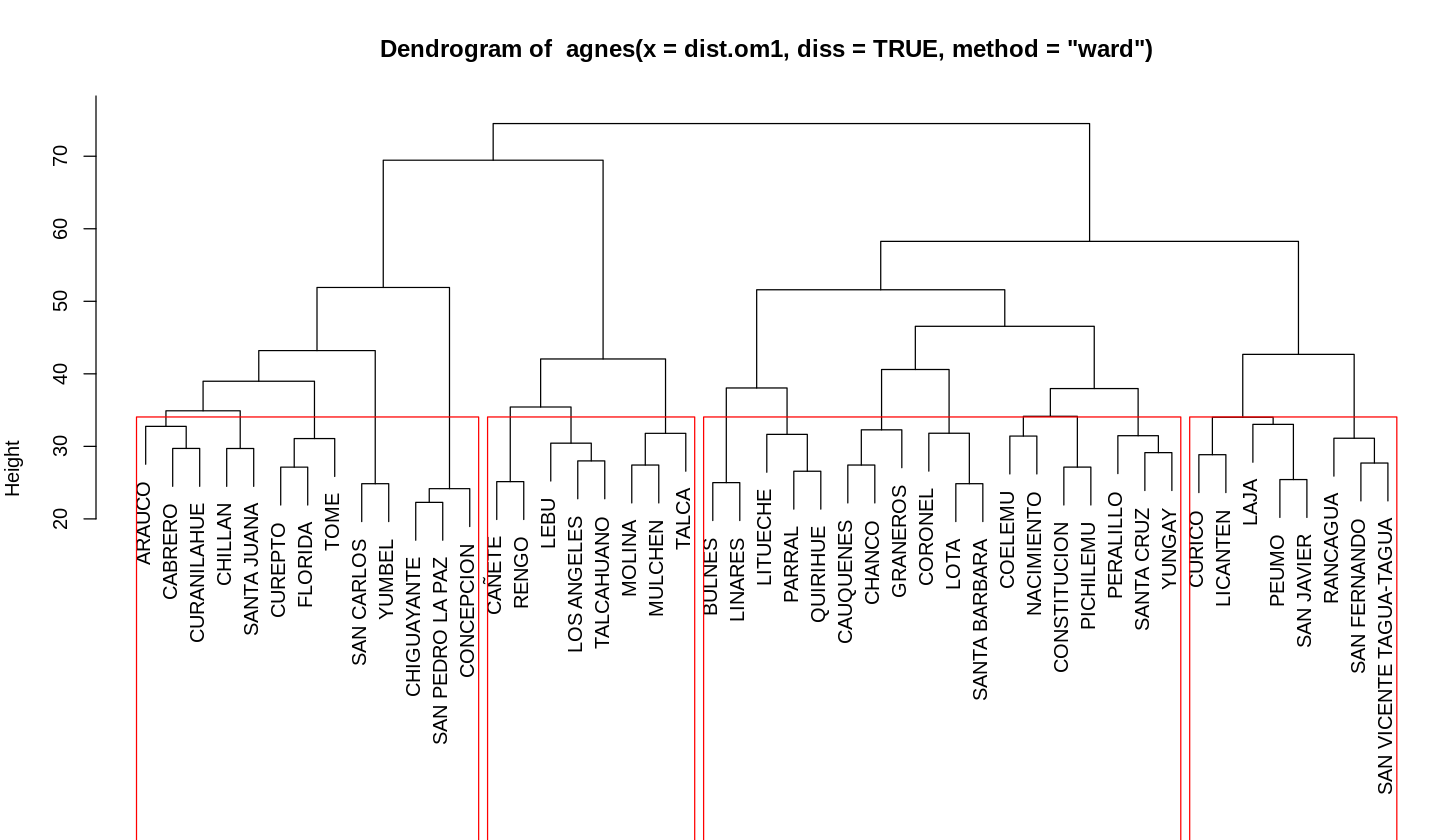

In [ ]:
# Clustering y Visualización del Dendrograma con Método Ward
par(mar = c(0.0, 4.0, 4.0, 0.1)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
clusterward1 <- agnes(dist.om1, diss = TRUE, method = "ward")
plot(clusterward1, which.plot = 2)
rect.hclust(clusterward1,k=4,border="red")

cl1.4 <- cutree(clusterward1, k = 4)
cl1.4fac <- factor(cl1.4, labels = paste("Type", 1:4))

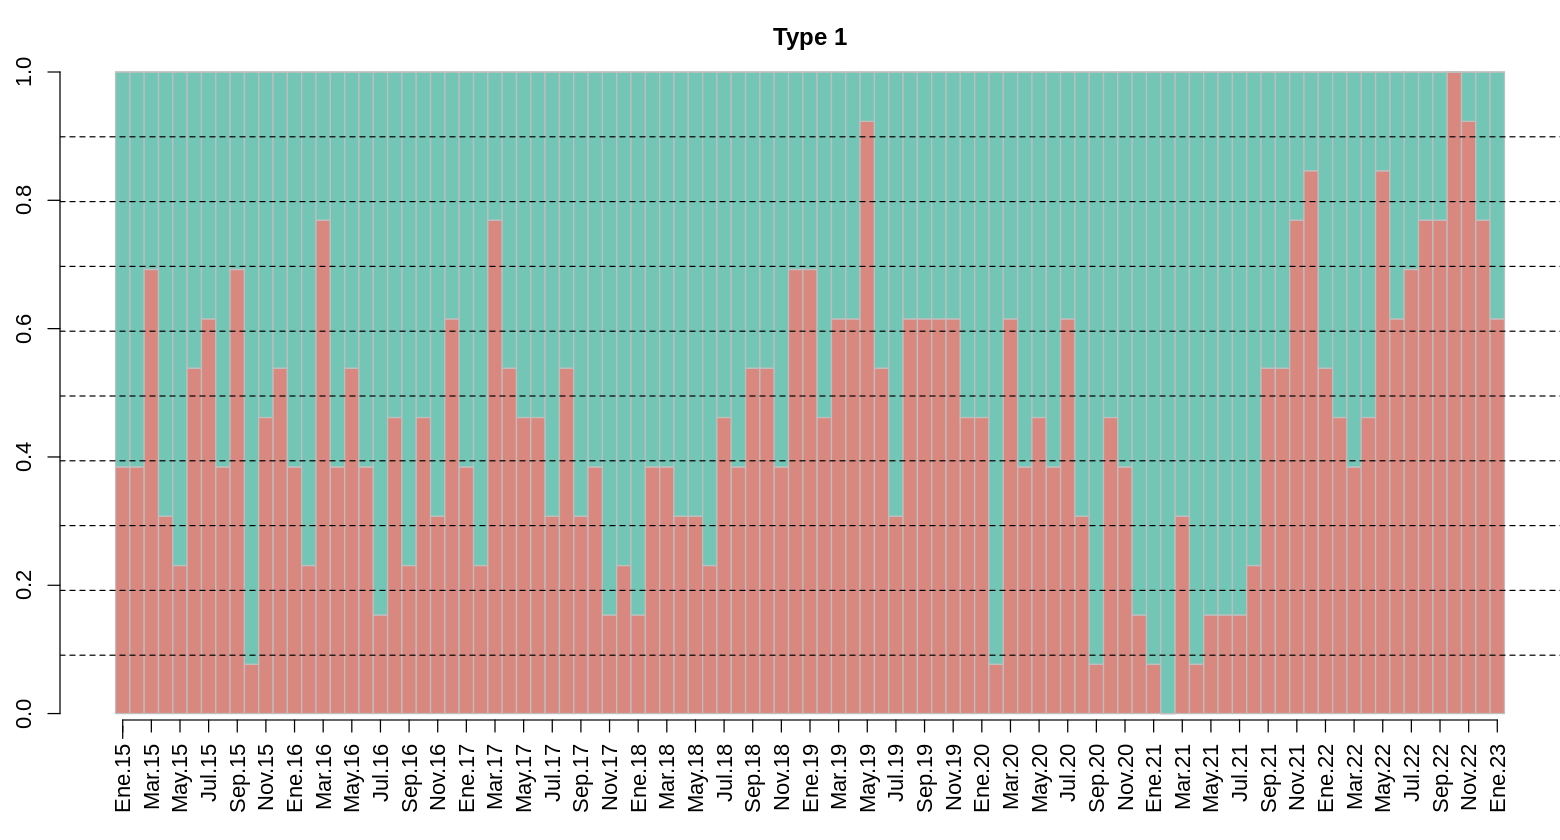

In [ ]:
# Visualización de Secuencia para Tipo 1
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqdplot(ZCE.seq[cl1.4fac == "Type 1",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 1", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1)


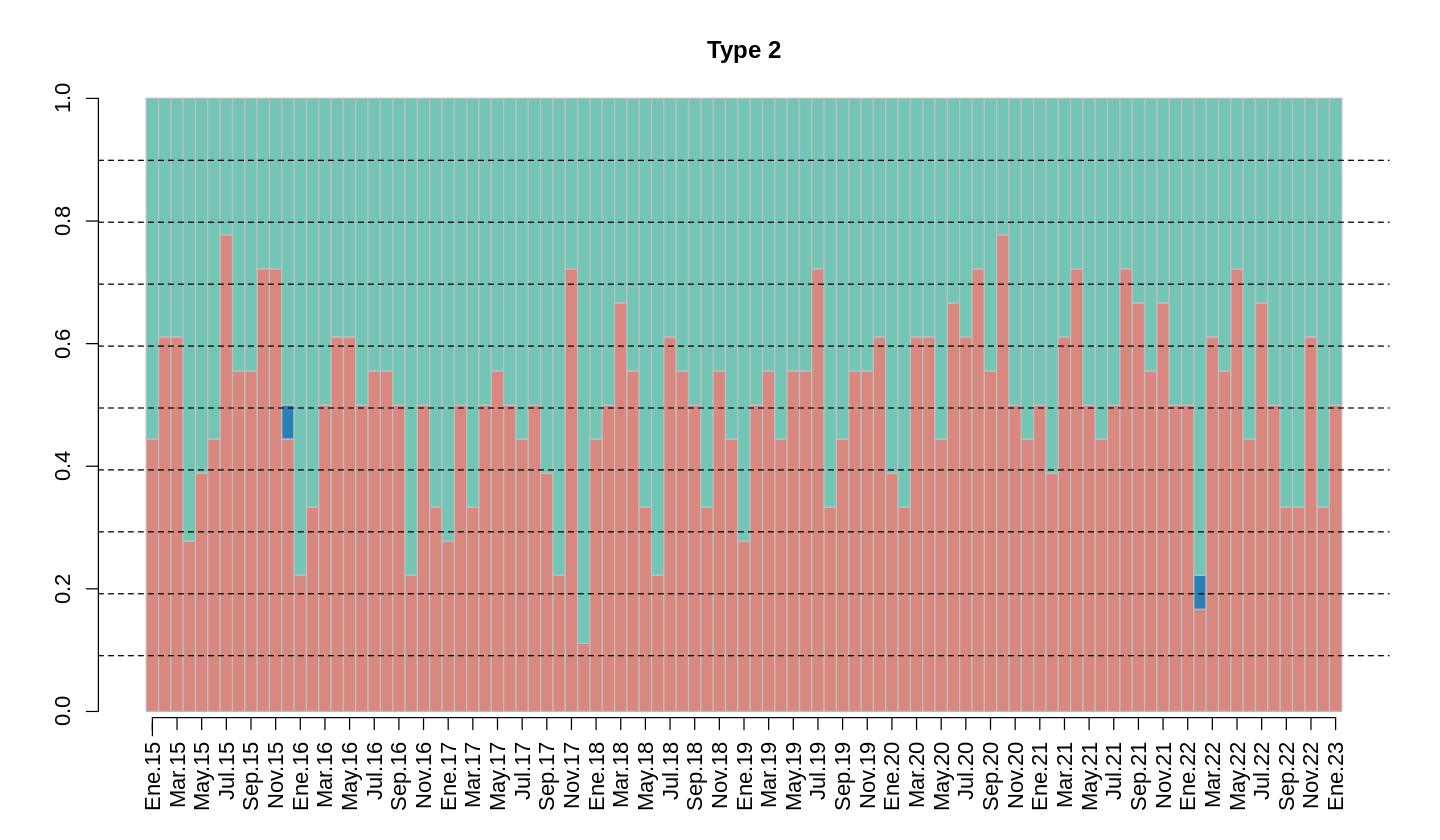

In [ ]:
# Visualización de Secuencia para Tipo 2
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqdplot(ZCE.seq[cl1.4fac == "Type 2",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 2", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1)

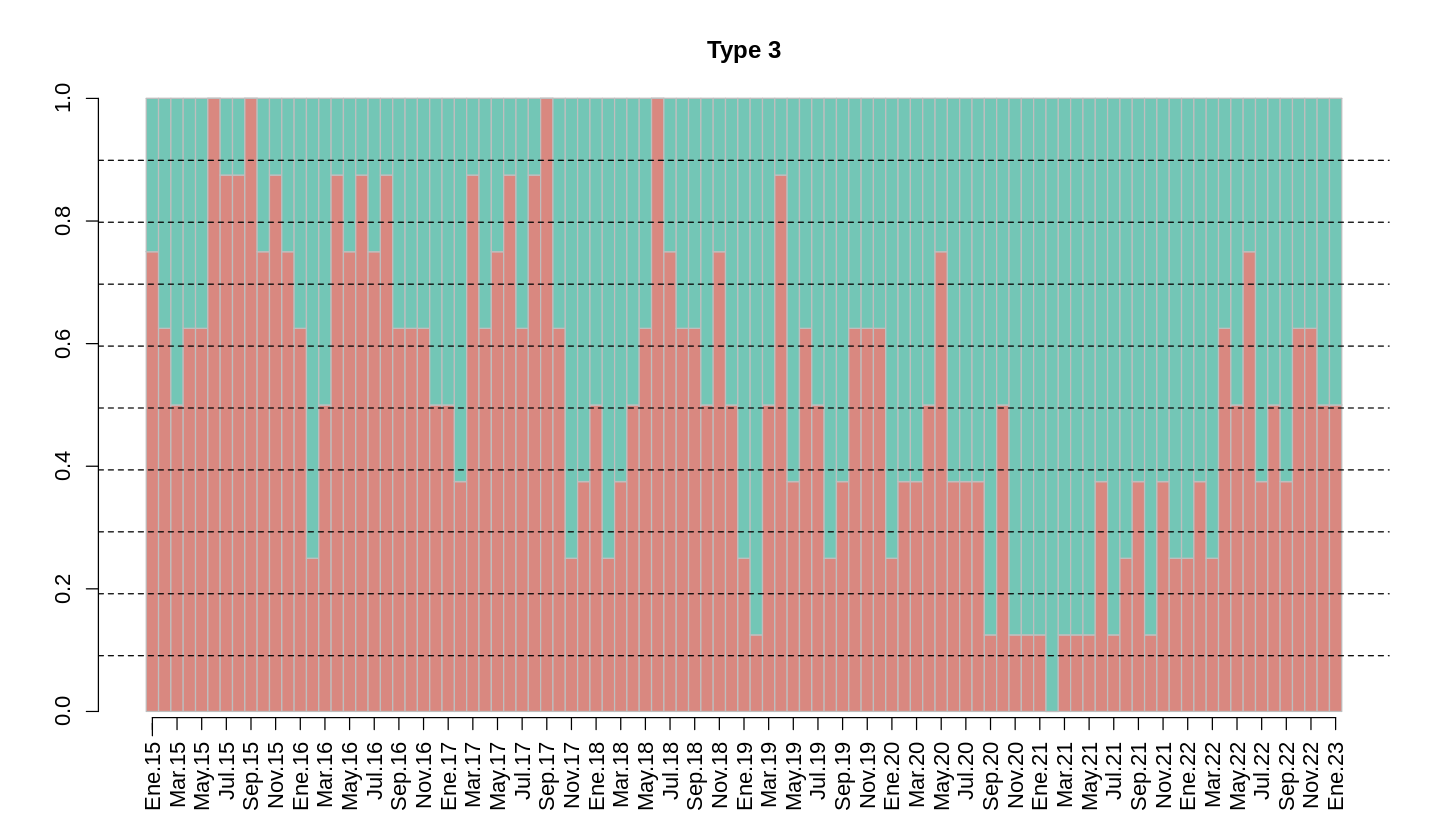

In [ ]:
# Visualización de Secuencia para Tipo 3
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqdplot(ZCE.seq[cl1.4fac == "Type 3",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 3", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1)

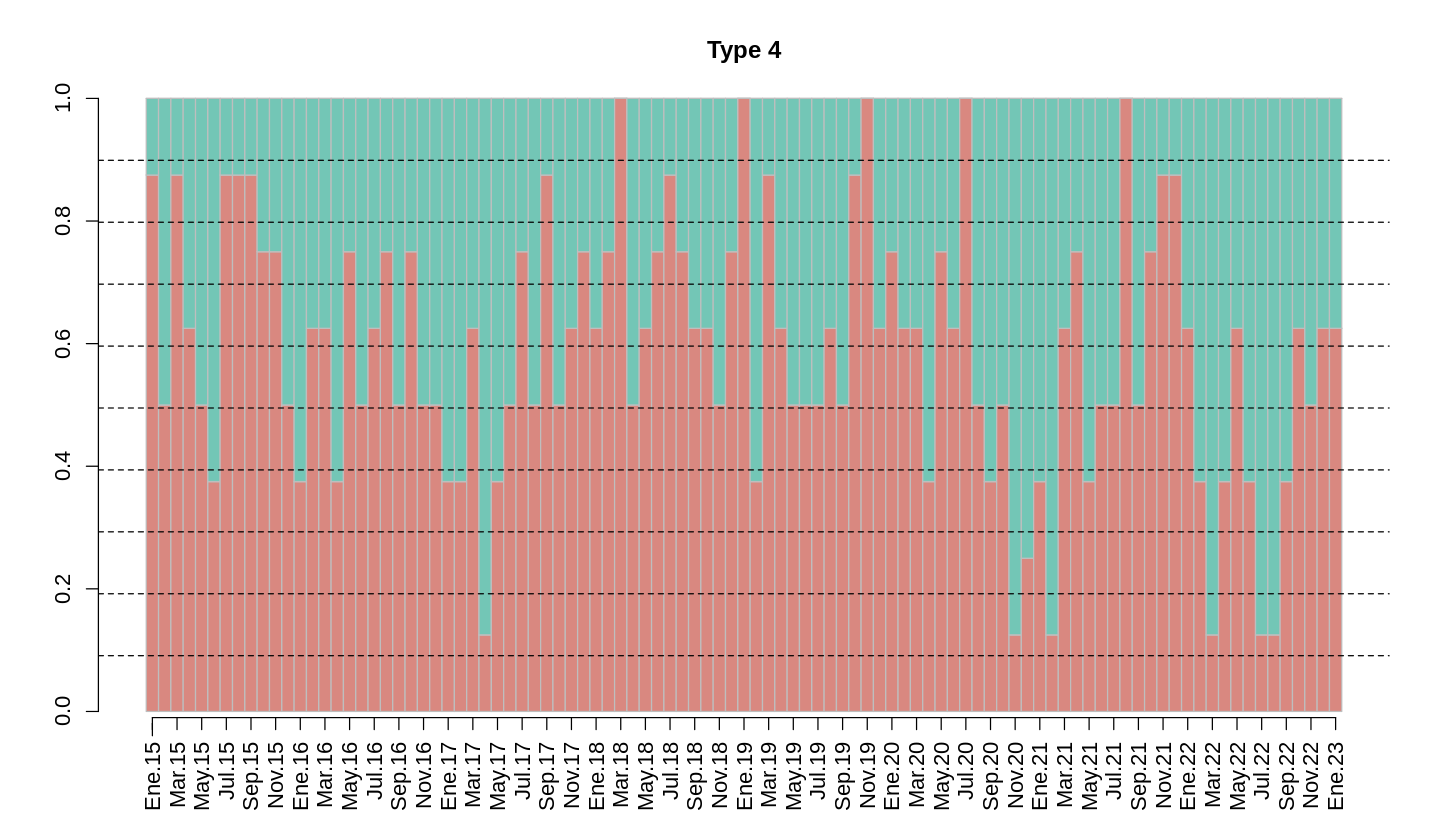

In [ ]:
# Visualización de Secuencia para Tipo 4
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=13, repr.plot.height=7)
seqdplot(ZCE.seq[cl1.4fac == "Type 4",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 4", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZCE.seq)), by = 2)-.5, labels = colnames(ZCE.seq)[seq(1, length(colnames(ZCE.seq)), by = 2)], las = 2, cex.axis = 1.1)